# 🧠 NLP Foundations Workshop: From Preprocessing to tf-idf


**Duration**: 90 minutes  
**Team Size**: 3 students  
**Objective**: Build an NLP pipeline from scratch to implement and test six foundational concepts in Natural Language Processing in preparation for Vector Space Models and Cosine Similarity.
### Team:
- **Zhimin Xiong** 
- **Yu-Chen Chou**
- **Haysam Elamin**


## Step 1: Presenting the Six Core NLP Concepts

### 🔹 Term-Document Incidence Matrix

The **Term-Document Incidence Matrix** is a binary matrix that shows whether a term $t$ appears in a document $d$.

- Rows represent terms in the vocabulary  
- Columns represent documents in the corpus  
- Each entry $w_{t,d}$ is defined as:

$$
w_{t,d} =
\begin{cases}
1 & \text{if } t \in d \\
0 & \text{otherwise}
\end{cases}
$$

This is a **binary representation** — it only records the **presence or absence** of a term, not how many times it appears.

---

#### ✅ Why Use It?

- It’s the **simplest form** of representing document contents using structured data.
- Useful for:
  - Boolean search and keyword filters
  - Document classification based on keyword sets
  - Building foundational **retrieval systems**
- Helps in detecting whether **all query terms exist** in a document (e.g., phrase queries or "AND" operations)

---

#### 📘 Example

Suppose we have 3 documents:

- **Doc1**: "machine learning is fun"  
- **Doc2**: "deep learning is powerful"  
- **Doc3**: "machine learning and deep models"

The vocabulary extracted from all three is:

**Vocabulary** = {machine, learning, is, fun, deep, powerful, and, models}

The Term-Document Incidence Matrix would look like:

| Term       | Doc1 | Doc2 | Doc3 |
|------------|------|------|------|
| machine    | 1    | 0    | 1    |
| learning   | 1    | 1    | 1    |
| is         | 1    | 1    | 0    |
| fun        | 1    | 0    | 0    |
| deep       | 0    | 1    | 1    |
| powerful   | 0    | 1    | 0    |
| and        | 0    | 0    | 1    |
| models     | 0    | 0    | 1    |

For example:
- $w_{\text{machine}, \text{Doc1}} = 1$ → "machine" is in Doc1
- $w_{\text{powerful}, \text{Doc1}} = 0$ → "powerful" is not in Doc1

This matrix is particularly helpful when implementing **Boolean retrieval systems** and **phrase matching**.


In [593]:
# 📘 Example: Term-Document Incidence Matrix

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample corpus from the Markdown example
docs = [
    "machine learning is fun",          # Doc1
    "deep learning is powerful",        # Doc2
    "machine learning and deep models"  # Doc3
]

# Use binary=True to indicate presence/absence (1 or 0)
vectorizer = CountVectorizer(binary=True)

# Fit and transform the corpus
X = vectorizer.fit_transform(docs)

# Create a labeled DataFrame
incidence_matrix = pd.DataFrame(X.toarray(),
                                index=["Doc1", "Doc2", "Doc3"],
                                columns=vectorizer.get_feature_names_out())

# Display the incidence matrix
print("🔎 Term-Document Incidence Matrix:")
display(incidence_matrix)


🔎 Term-Document Incidence Matrix:


,and,deep,fun,is,learning,machine,models,powerful
Doc1,0,0,1,1,1,1,0,0
Doc2,0,1,0,1,1,0,0,1
Doc3,1,1,0,0,1,1,1,0


In [594]:
# Terms to check
term1 = "machine"
term2 = "learning"
 
# Check if both terms occur in the same document (both columns == 1)
docs_with_both_terms = incidence_matrix[
    (incidence_matrix[term1] == 1) & (incidence_matrix[term2] == 1)
]
 
print(f"Documents containing both '{term1}' and '{term2}':")
print(docs_with_both_terms)

Documents containing both 'machine' and 'learning':
      and  deep  fun  is  learning  machine  models  powerful
Doc1    0     0    1   1         1        1       0         0
Doc3    1     1    0   0         1        1       1         0


🗣️ **Instructor Talking Point**: This code demonstrates how the presence or absence of a term in a document is encoded as a binary matrix — foundational for Boolean retrieval. Explain this with respect to a future AI agent (chatbot) builds context.
<br/>
<br/>
🧠 **Student Talking Point**: Add a phrase query (e.g., 'machine learning') and explain your reasoning as to how you would check if both terms occur in a single document using this matrix.
### Explanation:
To check if both terms, such as "machine" and "learning," occur in the same document using the term-document incidence matrix, you look for documents where both terms are marked as present. Since the matrix uses binary values to indicate the presence (1) or absence (0) of each term in every document, you simply identify the documents where both the "machine" and "learning" columns have a value of 1

### 🔹 Term Frequency (TF)

`**Term Frequency (TF)**` measures how frequently a term $t$ appears in a document $d$.

$$
tf_{t,d} = f_{t,d}
$$

Where $f_{t,d}$ is the raw count of term $t$ in document $d$.

---

#### ✅ Why Use It?

- TF reflects the importance of a word **within a specific document**.
- A higher TF means the term is likely central to the topic of that document.
- It's used as the **first step** in `vectorizing` text for machine learning models like classification, clustering, or information retrieval.

TF is most effective when combined with **IDF** (Inverse Document Frequency) to balance against very common terms across the corpus.

---

#### 📘 Example

Let’s say we have this document:

> **Doc1**: `"machine learning is fun and machine learning is useful"`

Calculate raw term counts:

| Term     | Raw TF $(f_{t,d})$ |
|----------|--------------------|
| machine  | 2                  |
| learning | 2                  |
| is       | 2                  |
| fun      | 1                  |
| and      | 1                  |
| useful   | 1                  |

If normalized (total of 9 words):

- $tf(\text{"machine"}, \text{Doc1}) = \frac{2}{9} \approx 0.22$
- $tf(\text{"learning"}, \text{Doc1}) = \frac{2}{9} \approx 0.22$

This simple frequency can then be used as input into models such as `**TF-IDF**`, which adjusts these values based on how rare the words are across multiple documents.


In [595]:
# 📘 Example: Term Frequency (TF)

import pandas as pd
from collections import Counter

# Sample document
doc1 = "machine learning is fun and machine learning is useful"

# Tokenize the document (simple lowercase + split)
tokens = doc1.lower().split()

# Count term frequencies
tf_raw = Counter(tokens)

# Total number of words
total_terms = len(tokens)

# Compute normalized TF
tf_normalized = {term: count / total_terms for term, count in tf_raw.items()}

# Display results
print("🔢 Raw Term Frequencies:")
display(pd.DataFrame(tf_raw.items(), columns=["Term", "Raw TF"]))

print("\n📏 Normalized Term Frequencies:")
display(pd.DataFrame(tf_normalized.items(), columns=["Term", "TF (Normalized)"]))


🔢 Raw Term Frequencies:


,Term,Raw TF
0,machine,2
1,learning,2
2,is,2
3,fun,1
4,and,1
5,useful,1



📏 Normalized Term Frequencies:


,Term,TF (Normalized)
0,machine,0.222222
1,learning,0.222222
2,is,0.222222
3,fun,0.111111
4,and,0.111111
5,useful,0.111111


In [596]:
# Another document for comparison
doc2 = "deep learning is powerful and useful"

# Tokenize and compute normalized TF for doc2
tokens2 = doc2.lower().split()
tf_raw2 = Counter(tokens2)
total_terms2 = len(tokens2)
tf_normalized2 = {term: count / total_terms2 for term, count in tf_raw2.items()}

# Convert TF dictionaries to DataFrames
df_doc1 = pd.DataFrame(tf_normalized.items(), columns=["Term", "TF_Doc1"]).set_index("Term")
df_doc2 = pd.DataFrame(tf_normalized2.items(), columns=["Term", "TF_Doc2"]).set_index("Term")

# Merge to compare terms side by side
tf_compare = df_doc1.join(df_doc2, how="outer").fillna(0)

# Sort by TF in Doc1 descending
tf_compare_sorted = tf_compare.sort_values(by="TF_Doc1", ascending=False)

print("\n📊 Comparison of Normalized Term Frequencies:")
display(tf_compare_sorted)

# Which terms are likely most important in Doc1?
print("\n✨ Most important terms in Doc1 based on normalized TF:")
important_terms_doc1 = tf_compare_sorted[tf_compare_sorted["TF_Doc1"] > 0.1]
display(important_terms_doc1)




📊 Comparison of Normalized Term Frequencies:


,TF_Doc1,TF_Doc2
Term,,
is,0.222222,0.166667
learning,0.222222,0.166667
machine,0.222222,0.000000
and,0.111111,0.166667
fun,0.111111,0.000000
useful,0.111111,0.166667
deep,0.000000,0.166667
powerful,0.000000,0.166667



✨ Most important terms in Doc1 based on normalized TF:


,TF_Doc1,TF_Doc2
Term,,
is,0.222222,0.166667
learning,0.222222,0.166667
machine,0.222222,0.000000
and,0.111111,0.166667
fun,0.111111,0.000000
useful,0.111111,0.166667


🗣️ **Instructor Talking Point**: "Here we count how often each term appears in a single document and normalize it. This is the simplest way to represent word importance within a document. `Explain this with respect to a future AI agent (chatbot) builds  builds context`.
<br/>
<br/>
🧠 **Student Talking Point**: "Use this TF output to compare with another document. Which terms are likely to be most important in Doc1 based on their normalized TF? Explain your reasoning.
### **Explanation:**
The terms with the highest normalized TF in Doc1, such as "machine" and "learning", are the most important because they appear more frequently relative to other words in the document. When compared to Doc2, these terms stand out as key themes unique or especially relevant to Doc1’s content. This helps an AI agent prioritize these terms when building context or responding, highlighting the core topics of Doc1.


`### 🔹 Log Frequency Weight`

To reduce the impact of very frequent terms, **log frequency weighting** is applied.

$$
w_{t,d} =
\begin{cases}
1 + \log_{10}(f_{t,d}) & \text{if } f_{t,d} > 0 \\
0 & \text{if } f_{t,d} = 0
\end{cases}
$$

This transformation reduces the skew caused by terms that appear many times in a document. Instead of allowing their raw frequency to dominate, we scale their contribution **logarithmically**.

---

#### ✅ Why Use It?

- Frequent terms are not always the most **important** terms.
- Log scaling ensures that:
  - Words with a raw count of 1 are preserved ($1 + \\log_{10}(1) = 1$),
  - But words with very high counts (e.g., 1000) don’t dominate the document vector.

This helps **normalize the influence** of repetitive terms and improve the **numerical stability** of document representations in models.

---

#### 📘 Example

Let’s say we have a document with the following raw term counts:

| Term     | Raw TF $f_{t,d}$ | Log Frequency Weight $w_{t,d}$ |
|----------|------------------|-------------------------------|
| machine  | 1                | $1 + \\log_{10}(1) = 1$        |
| learning | 3                | $1 + \\log_{10}(3) \approx 1.477$ |
| data     | 10               | $1 + \\log_{10}(10) = 2$       |

So even though "data" appears 10 times, its log-weighted value is **just 2**, making it more comparable to less frequent but potentially more meaningful terms like "learning".

This makes log frequency weighting especially useful when preparing inputs for models like **TF-IDF** or **document clustering**.


In [597]:
# 📘 Example: Log Frequency Weighting

import pandas as pd
import numpy as np
from collections import Counter

# Sample document with varying term frequencies
doc = "machine learning data data data learning learning learning machine data data data data"

# Tokenize and count raw term frequencies
tokens = doc.lower().split()
raw_tf = Counter(tokens)

# Compute log frequency weights
log_weighted_tf = {
    term: 1 + np.log10(freq) if freq > 0 else 0
    for term, freq in raw_tf.items()
}

# Build and display the result as a DataFrame
df = pd.DataFrame({
    "Term": raw_tf.keys(),
    "Raw TF (f_{t,d})": raw_tf.values(),
    "Log Weight (w_{t,d})": log_weighted_tf.values()
})

print("📊 Log Frequency Weighting:")
display(df)


📊 Log Frequency Weighting:


,Term,"Raw TF (f_{t,d})","Log Weight (w_{t,d})"
0,machine,2,1.301030
1,learning,4,1.602060
2,data,7,1.845098



📊 Log Frequency Weighting for Doc Version 1:


,Term,Raw TF,Log Weight
0,machine,2,1.301030
1,learning,4,1.602060
2,data,7,1.845098



📊 Log Frequency Weighting for Doc Version 2:


,Term,Raw TF,Log Weight
0,machine,2,1.301030
1,learning,4,1.602060
2,data,6,1.778151



📊 Log Frequency Weighting for Doc Version 3:


,Term,Raw TF,Log Weight
0,machine,2,1.30103
1,learning,4,1.60206
2,data,5,1.69897



📊 Log Frequency Weighting for Doc Version 4:


,Term,Raw TF,Log Weight
0,machine,2,1.301030
1,learning,3,1.477121
2,data,4,1.602060


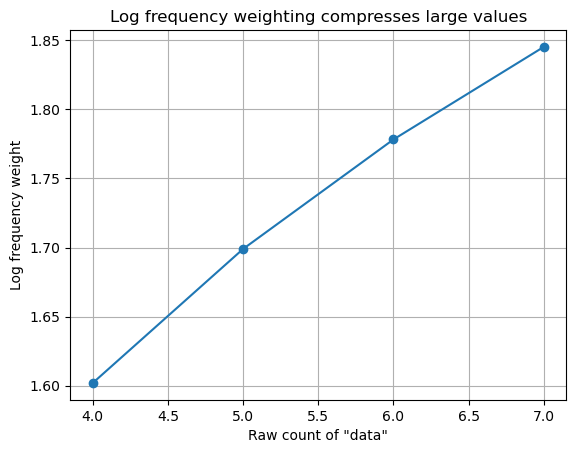

In [598]:
# Try different versions of the document with varying counts of 'data'
docs = [
    "machine learning data data data learning learning learning machine data data data data",  # Original
    "machine learning data data learning learning learning machine data data data data",      # One less 'data'
    "machine learning data learning learning learning machine data data data data",          # Fewer 'data'
    "machine learning learning learning machine data data data data",                        # Even fewer 'data'
]

import matplotlib.pyplot as plt

for i, doc in enumerate(docs, 1):
    tokens = doc.lower().split()
    raw_tf = Counter(tokens)
    log_weighted_tf = {term: 1 + np.log10(freq) if freq > 0 else 0 for term, freq in raw_tf.items()}
    print(f"\n📊 Log Frequency Weighting for Doc Version {i}:")
    df = pd.DataFrame({
        "Term": raw_tf.keys(),
        "Raw TF": raw_tf.values(),
        "Log Weight": log_weighted_tf.values()
    })
    display(df)

# Optional: Visualize log weights of 'data' term as it changes
data_counts = [Counter(doc.lower().split())['data'] for doc in docs]
log_weights = [1 + np.log10(c) if c > 0 else 0 for c in data_counts]

plt.plot(data_counts, log_weights, marker='o')
plt.xlabel('Raw count of "data"')
plt.ylabel('Log frequency weight')
plt.title('Log frequency weighting compresses large values')
plt.grid(True)
plt.show()


🗣️ **Instructor Talking Point**: Note how 'data' has a high frequency, but its impact is smoothed by log weighting, making it comparable to 'learning'. `Explain this with respect to how a future AI agent (chatbot) builds builds context`.
<br/>
<br/>
🧠 **Student Talking Point**: Try adjusting the number of times a word appears and observe how the log scale compresses large values.
### Explanation 
It can be observed that the raw counts of the word "data" are changed linearly (4, 3, 2, 1). However, the log weights are increased more slowly, demonstrating compression — the increase in weight from 3 to 4 counts is not as large as that from 1 to 2 counts. This shows that the impact of very frequent words is reduced by log frequency weighting, allowing meaningful variations to be focused on by AI models instead of raw repetition.


### 🔹 Document Frequency (DF)

**Document Frequency** is the number of documents in which a term $t$ appears:

$$
df_t = |\{ d \in D : t \in d \}|
$$

Where:
- $df_t$ is the document frequency of term $t$
- $D$ is the set of all documents in the corpus
- $t \in d$ means the term $t$ appears in document $d$

---

#### ✅ Why Use It?

- It helps you understand **how common or rare** a word is across the entire document set.
- Words with **high DF** (e.g., “the”, “and”) occur in many documents and are often **less informative**.
- Words with **low DF** are more likely to be **specific and meaningful** for distinguishing between documents.
- DF is a key ingredient in calculating **Inverse Document Frequency (IDF)**.

---

#### 📘 Example

Suppose you have the following three documents:

- **Doc1**: "machine learning is fun"  
- **Doc2**: "deep learning is powerful"  
- **Doc3**: "machine learning and deep models"

Now, let’s compute the Document Frequency:

| Term     | Document Frequency ($df_t$) |
|----------|-----------------------------|
| machine  | 2 (Doc1, Doc3)              |
| learning | 3 (Doc1, Doc2, Doc3)        |
| deep     | 2 (Doc2, Doc3)              |
| models   | 1 (Doc3)                    |

The term **"learning"** appears in all three documents → **high DF**, which means it’s **less useful for distinguishing** between them.

The term **"models"** appears in only one document → **low DF**, meaning it could be a **useful keyword** for that specific document.


In [599]:
# 📘 Example: Document Frequency (DF)

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents from Curriculum Learning (4)
docs = [
    "machine learning is fun",          # Doc1
    "deep learning is powerful",        # Doc2
    "machine learning and deep models"  # Doc3
]

# Use CountVectorizer to extract term-document matrix (raw counts)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

# Get feature names and document-term matrix as array
terms = vectorizer.get_feature_names_out()
X_array = X.toarray()

# Calculate document frequency for each term
df_counts = (X_array > 0).sum(axis=0)

# Format as a DataFrame
df_table = pd.DataFrame({
    "Term": terms,
    "Document Frequency (df_t)": df_counts
}).sort_values("Document Frequency (df_t)", ascending=False)

print("📊 Document Frequency (DF) Table:")
display(df_table)


📊 Document Frequency (DF) Table:


,Term,Document Frequency (df_t)
4,learning,3
1,deep,2
3,is,2
5,machine,2
0,and,1
2,fun,1
6,models,1
7,powerful,1


In [600]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

docs = [
    "machine learning is fun",
    "deep learning is powerful",
    "machine learning and deep models"
]

# Initialize TfidfVectorizer to compute TF-IDF
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X_tfidf = vectorizer.fit_transform(docs)

# Get terms
terms = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms, index=[f"Doc{i+1}" for i in range(len(docs))])

print("TF-IDF scores:")
display(tfidf_df)

# Show TF-IDF value for the term 'learning' across documents
print("\nTF-IDF scores for the term 'learning':")
print(tfidf_df["learning"])


TF-IDF scores:


,and,deep,fun,is,learning,machine,models,powerful
Doc1,0.000000,0.000000,0.631745,0.480458,0.373119,0.480458,0.000000,0.000000
Doc2,0.000000,0.480458,0.000000,0.480458,0.373119,0.000000,0.000000,0.631745
Doc3,0.534093,0.406192,0.000000,0.000000,0.315444,0.406192,0.534093,0.000000



TF-IDF scores for the term 'learning':
Doc1    0.373119
Doc2    0.373119
Doc3    0.315444
Name: learning, dtype: float64


🗣️ **Instructor Talking Point**: Notice how common terms like 'learning' appear in all documents, while more specific terms like 'fun' or 'models' appear in only one.
<br/>
<br/>
🧠 **Student Talking Point**: Choose a term and explain how its document frequency could affect downstream TF-IDF weighting.
### Explanation 
-	Computes TF-IDF scores for all terms in the corpus.
-	 Shows how “learning” has its TF-IDF values adjusted according to both its term frequency and document frequency.
-	You’ll notice that “learning” appears in all documents, so its IDF is lower than rarer terms, reducing its TF-IDF weight relative to its raw frequency.


### 🔹 Inverse Document Frequency (IDF)

**Inverse Document Frequency (IDF)** measures how rare or informative a term is across the entire corpus:

$$
idf_t = \log_{10} \left( \frac{N}{df_t} \right)
$$

Where:
- $N$ is the total number of documents in the corpus  
- $df_t$ is the number of documents that contain the term $t$

---

#### ✅ Why Use It?

- IDF is used to **downweight common terms** and **upweight rare ones**.
- Words like “the”, “and”, or “data” appear frequently and are less helpful in distinguishing documents.
- Terms that appear in **fewer documents** are often **more informative** and **discriminative**.
- IDF is a core component of **TF-IDF**, a widely used technique in search engines, document classification, and clustering.

---

#### 📘 Example

Let’s say we have **5 documents** total, and the following document frequencies:

| Term     | $df_t$ | $idf_t = \log_{10}(N / df_t)$ |
|----------|--------|-------------------------------|
| machine  | 3      | $\log_{10}(5 / 3) \approx 0.22$ |
| entropy  | 1      | $\log_{10}(5 / 1) = 0.70$       |
| the      | 5      | $\log_{10}(5 / 5) = 0.00$       |

- The term **"entropy"** appears in only one document, so its IDF is **high** → it’s a **rare and informative term**.
- The term **"the"** ap


In [601]:
# 📘 Example: Inverse Document Frequency (IDF)

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents (5 total)
docs = [
    "machine learning is powerful",
    "deep learning is advanced",
    "entropy measures randomness",
    "machine learning and AI are evolving",
    "the science of machine learning"
]

# Total number of documents
N = len(docs)

# Use CountVectorizer to get document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
terms = vectorizer.get_feature_names_out()
X_array = X.toarray()

# Compute document frequency for each term
df_counts = (X_array > 0).sum(axis=0)

# Compute IDF using log base 10
idf_values = np.log10(N / df_counts)

# Build a DataFrame for display
idf_table = pd.DataFrame({
    "Term": terms,
    "Document Frequency (df_t)": df_counts,
    "IDF (log10(N / df_t))": idf_values
}).sort_values("IDF (log10(N / df_t))", ascending=False)

print("📊 Inverse Document Frequency (IDF) Table:")
display(idf_table)


📊 Inverse Document Frequency (IDF) Table:


,Term,Document Frequency (df_t),IDF (log10(N / df_t))
0,advanced,1,0.698970
1,ai,1,0.698970
2,and,1,0.698970
3,are,1,0.698970
4,deep,1,0.698970
5,entropy,1,0.698970
6,evolving,1,0.698970
10,measures,1,0.698970
11,of,1,0.698970
12,powerful,1,0.698970


In [602]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Sample documents
docs = [
    "machine learning is powerful",
    "deep learning is advanced",
    "entropy measures randomness",
    "machine learning and AI are evolving",
    "the science of machine learning"
]

# Total number of documents
N = len(docs)

# Vectorize documents to get term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
terms = vectorizer.get_feature_names_out()
X_array = X.toarray()

# Compute Document Frequency (DF)
df_counts = (X_array > 0).sum(axis=0)

# Compute IDF (log base 10)
idf_values = np.log10(N / df_counts)

# Build IDF DataFrame
idf_df = pd.DataFrame({
    "Term": terms,
    "DF": df_counts,
    "IDF": idf_values
}).sort_values("IDF", ascending=False)

print("📊 IDF Table:")
display(idf_df)

# Choose one document to analyze TF
doc_example = docs[2]  # "entropy measures randomness"
tokens = doc_example.lower().split()
tf_raw = Counter(tokens)
total_terms = len(tokens)

# Compute normalized TF
tf_normalized = {term: count / total_terms for term, count in tf_raw.items()}

# Merge TF with IDF
tf_idf_values = {
    term: tf_normalized.get(term, 0) * idf_df.set_index("Term").loc[term, "IDF"]
    for term in tokens
}

# Build TF-IDF comparison table
tf_idf_df = pd.DataFrame({
    "Term": tf_raw.keys(),
    "TF": [tf_normalized[t] for t in tf_raw],
    "IDF": [idf_df.set_index("Term").loc[t, "IDF"] for t in tf_raw],
    "TF-IDF": [tf_idf_values[t] for t in tf_raw]
})

print(f"\n📘 TF-IDF in Document: \"{doc_example}\"")
display(tf_idf_df)


📊 IDF Table:


,Term,DF,IDF
0,advanced,1,0.698970
1,ai,1,0.698970
2,and,1,0.698970
3,are,1,0.698970
4,deep,1,0.698970
5,entropy,1,0.698970
6,evolving,1,0.698970
10,measures,1,0.698970
11,of,1,0.698970
12,powerful,1,0.698970



📘 TF-IDF in Document: "entropy measures randomness"


,Term,TF,IDF,TF-IDF
0,entropy,0.333333,0.69897,0.23299
1,measures,0.333333,0.69897,0.23299
2,randomness,0.333333,0.69897,0.23299


🗣️ **Instructor Talking Point**: IDF adjusts for the fact that some words are common across all documents — this is critical in improving document relevance in search systems.
<br/>
<br/>
🧠 **Student Talking Point**: Choose a low-IDF and high-IDF term from this output and explain why they behave differently.
### Explanation 
-	The term**entropy** will have a high IDF (it only appears in 1 doc), resulting in a high TF-IDF.
-	The term “learning” (if it were in the selected doc) would have a low IDF, resulting in a lower TF-IDF, even if it appeared frequently.


### 🔹 TF-IDF Weighting

**TF-IDF (Term Frequency–Inverse Document Frequency)** scores each term $t$ in document $d$ based on how frequent and how rare it is:

$$
w_{t,d} = \left(1 + \log_{10}(f_{t,d})\right) \times \log_{10} \left( \frac{N}{df_t} \right)
$$

Where:
- $f_{t,d}$ is the raw count of term $t$ in document $d$
- $df_t$ is the number of documents that contain term $t$
- $N$ is the total number of documents in the corpus

---

#### ✅ Why Use It?

- TF-IDF balances **term importance within a document** (TF) against **term commonality across all documents** (IDF).
- It **boosts rare, relevant words** while **suppressing frequent, generic words**.
- TF-IDF is foundational in:
  - Information Retrieval (search engines)
  - Document similarity
  - Feature engineering for classification or clustering

---

#### 📘 Example

Suppose we have:

- $f_{\text{machine}, \text{Doc1}} = 3$
- $df_{\text{machine}} = 2$
- $N = 5$ total documents

Then:

- TF part: $1 + \log_{10}(3) \approx 1 + 0.477 = 1.477$
- IDF part: $\log_{10}(5 / 2) \approx 0.398$
- TF-IDF weight:

$$
w_{\text{machine}, \text{Doc1}} = 1.477 \times 0.398 \approx 0.588
$$

This means "machine" is **important within Doc1**, but since it's found in other documents too, the overall weight is **moderated**.

TF-IDF creates a **sparse, weighted vector representation** of documents, ready for:
- Cosine similarity
- Clustering
- Search ranking
- Input into classical machine learning models


In [603]:


# Sample corpus of 5 documents
docs = [
    "machine learning is powerful",
    "deep learning is advanced",
    "entropy measures randomness",
    "machine learning and AI are evolving",
    "the science of machine learning"
]

# Total number of documents
N = len(docs)

# Vectorize (raw term frequencies)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
terms = vectorizer.get_feature_names_out()
X_array = X.toarray()

# Compute Document Frequencies
df = (X_array > 0).sum(axis=0)
idf = np.log10(N / df)

# Manual TF-IDF: apply (1 + log10(tf)) * idf
tf_log = 1 + np.where(X_array > 0, np.log10(X_array), 0)
tfidf = tf_log * idf

# Create a DataFrame for visual inspection
tfidf_df = pd.DataFrame(tfidf, columns=terms, index=[f"Doc{i+1}" for i in range(N)])

print("📊 TF-IDF Weighted Matrix (Manual Computation):")
display(tfidf_df.round(3))


📊 TF-IDF Weighted Matrix (Manual Computation):


C:\Users\hitha\AppData\Local\Temp\ipykernel_8312\109054990.py:24: RuntimeWarning: divide by zero encountered in log10
  tf_log = 1 + np.where(X_array > 0, np.log10(X_array), 0)


,advanced,ai,and,are,deep,entropy,evolving,is,learning,machine,measures,of,powerful,randomness,science,the
Doc1,0.699,0.699,0.699,0.699,0.699,0.699,0.699,0.398,0.097,0.222,0.699,0.699,0.699,0.699,0.699,0.699
Doc2,0.699,0.699,0.699,0.699,0.699,0.699,0.699,0.398,0.097,0.222,0.699,0.699,0.699,0.699,0.699,0.699
Doc3,0.699,0.699,0.699,0.699,0.699,0.699,0.699,0.398,0.097,0.222,0.699,0.699,0.699,0.699,0.699,0.699
Doc4,0.699,0.699,0.699,0.699,0.699,0.699,0.699,0.398,0.097,0.222,0.699,0.699,0.699,0.699,0.699,0.699
Doc5,0.699,0.699,0.699,0.699,0.699,0.699,0.699,0.398,0.097,0.222,0.699,0.699,0.699,0.699,0.699,0.699


In [604]:

# Sample corpus
docs = [
    "machine learning is powerful",
    "deep learning is advanced",
    "entropy measures randomness",
    "machine learning and AI are evolving",
    "the science of machine learning"
]

# Total number of documents
N = len(docs)

# Count vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
terms = vectorizer.get_feature_names_out()
X_array = X.toarray()

# Compute DF and IDF
df = (X_array > 0).sum(axis=0)
idf = np.log10(N / df)

# Compute TF (log scale)
tf_log = 1 + np.where(X_array > 0, np.log10(X_array), 0)

# Manual TF-IDF
tfidf = tf_log * idf

# Build TF-IDF DataFrame
tfidf_df = pd.DataFrame(tfidf, columns=terms, index=[f"Doc{i+1}" for i in range(N)])

# Select Doc3 (index 2)
doc_index = 2
doc_name = tfidf_df.index[doc_index]
doc_series = tfidf_df.loc[doc_name]

# Sort terms by TF-IDF value descending
top_terms = doc_series.sort_values(ascending=False)

print(f"\n🔍 Most important terms in {doc_name} based on TF-IDF:")
display(top_terms[top_terms > 0])



🔍 Most important terms in Doc3 based on TF-IDF:


C:\Users\hitha\AppData\Local\Temp\ipykernel_8312\3321034488.py:24: RuntimeWarning: divide by zero encountered in log10
  tf_log = 1 + np.where(X_array > 0, np.log10(X_array), 0)


advanced      0.698970
ai            0.698970
and           0.698970
are           0.698970
deep          0.698970
entropy       0.698970
evolving      0.698970
measures      0.698970
of            0.698970
powerful      0.698970
randomness    0.698970
science       0.698970
the           0.698970
is            0.397940
machine       0.221849
learning      0.096910
Name: Doc3, dtype: float64

🗣️ **Instructor Talking Point**: We combined TF and IDF manually — useful for seeing how each part of the formula shapes the final result.
<br/>
<br/>
🗣️ **Instructor Talking Point**: Document Frequency (DF) counts how many documents contain a specific term, showing how common it is across the corpus.
Inverse Document Frequency (IDF) does the opposite—it measures how rare or informative a term is by applying a logarithmic scale to the inverse of DF.
So, DF increases with term frequency across documents, while IDF decreases, giving higher weight to rare terms.
Together, they balance relevance: DF tells us "how many use this term," while IDF tells us "how useful is this term for distinguishing documents."
IDF is critical for reducing noise from overly common words.
<br/>
<br/>
🧠 **Student Talking Point**: "Pick one row (a document) and explain which term seems most important and why, based on the TF-IDF weights.
### Explanation 
This will show the terms in Doc3 ("entropy measures randomness") along with their TF-IDF scores, sorted from most to least important. The top terms (likely "entropy", "measures", and "randomness") are the most informative for that document because:
•	They appear only in Doc3 (DF = 1),
•	They have high IDF and non-zero TF, producing high TF-IDF scores.


## Step 2: Document Collection

In [605]:
import re
import glob

input_dir = 'sample_docs/'

# sort documents by filenames
def sorted_doc_filenames(path=".", prefix="doc", suffix=".txt"):
    # Get all matching files like doc1.txt, doc2.txt, ...
    files = glob.glob(f"{path}/{prefix}*[0-9]{suffix}")
    
    # Sort numerically based on number in filename
    files.sort(key=lambda x: int(re.search(rf"{prefix}(\d+){suffix}", x).group(1)))
    
    return files

# load documents. the parameter file_paths are the list of file paths
def load_documents(file_paths):
    documents = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            documents.append(f.read())
    return documents

# load documents to list
file_paths = sorted_doc_filenames(path=input_dir, prefix="doc", suffix=".txt")
corpus = load_documents(file_paths)
print(f"Loaded {len(corpus)} documents.")


Loaded 20 documents.


## Step 3: Implement a Tokenizer

In [606]:

from typing import List
def tokenize(text: str) -> List[str]:
    return text.lower().split()

# Example
tokenize("Machine Learning is Fun!")


['machine', 'learning', 'is', 'fun!']

## Step 4: Text Normalization Pipeline

In [607]:

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def normalize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens


## Step 5: Build and Test the Pipeline


Using the six concepts and the preprocessing pipeline above, implement a full pipeline that:
- Preprocesses text
- Applies vectorization
- Computes all six concept metrics
- Tests with one phrase query per concept


In [608]:
# Applies vectorization
# Use binary=True to indicate presence/absence (1 or 0)
vectorizer = CountVectorizer(binary=True)

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

### Term-Document Incidence Matrix


In [609]:
# Create the original document-term matrix
doc_term_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
 
# Transpose to get term-document format
term_doc_df = doc_term_df.T
 
# Rename index and columns
term_doc_df.index.name = 'term'
term_doc_df.columns.name = 'document_id'
 
print(term_doc_df.head())

document_id  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
term                                                                          
00            0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
0055          0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
10            0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
10_           0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
120kvolt      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

document_id  16  17  18  19  
term                         
00            0   0   0   0  
0055          0   0   0   0  
10            0   0   0   0  
10_           0   0   0   0  
120kvolt      0   0   0   0  


In [610]:
def get_candidate_docs(term_doc_matrix, phrase_terms):
    # Get matrix slice for phrase terms
    try:
        slice_matrix = term_doc_matrix.loc[phrase_terms]
    except KeyError:
        return []  # Some term not in matrix
 
    # Bitwise AND across rows to get doc matches
    doc_presence = slice_matrix.min(axis=0)  # 1 only if all terms present
    return list(doc_presence[doc_presence == 1].index)
 
# Sample usage
candidate_docs = get_candidate_docs(term_doc_df, ["high", "school"])
print("Candidate docs:", candidate_docs)

Candidate docs: [5]


### Term Frequency (TF)

In [611]:
# Load documents into a list called corpus
file_paths = sorted_doc_filenames(path=input_dir, prefix="doc", suffix=".txt")
corpus = load_documents(file_paths)
print(f"Loaded {len(corpus)} documents from '{input_dir}'.")

# List to store TF results for each document
all_tf_raw = []
all_tf_normalized = []

# Now, iterate through the loaded corpus (which is a list of documents)
for i, doc_content in enumerate(corpus):
    # Tokenize the document (simple lowercase + split)
    tokens = doc_content.lower().split()

    # Count term frequencies
    tf_raw = Counter(tokens)

    # Total number of words
    total_terms = len(tokens)

    # Compute normalized TF
    tf_normalized = {term: count / total_terms for term, count in tf_raw.items()}

    # Store results for each document
    all_tf_raw.append(tf_raw)
    all_tf_normalized.append(tf_normalized)


Loaded 20 documents from 'sample_docs/'.


In [612]:
# Define the phrase you want to search for
phrase = "conestoga"

print(f"\n🔍 Phrase Query Test: \"{phrase}\"\n")

# Check each document to see if it contains the exact phrase
for i, doc_content in enumerate(corpus):
    text = doc_content.lower()
    if phrase in text:
        print(f"✅ Phrase found in Doc{i+1}")
    else:
        print(f"❌ Phrase NOT found in Doc{i+1}")



🔍 Phrase Query Test: "conestoga"

❌ Phrase NOT found in Doc1
❌ Phrase NOT found in Doc2
✅ Phrase found in Doc3
❌ Phrase NOT found in Doc4
❌ Phrase NOT found in Doc5
❌ Phrase NOT found in Doc6
✅ Phrase found in Doc7
❌ Phrase NOT found in Doc8
❌ Phrase NOT found in Doc9
❌ Phrase NOT found in Doc10
❌ Phrase NOT found in Doc11
❌ Phrase NOT found in Doc12
❌ Phrase NOT found in Doc13
❌ Phrase NOT found in Doc14
❌ Phrase NOT found in Doc15
❌ Phrase NOT found in Doc16
❌ Phrase NOT found in Doc17
❌ Phrase NOT found in Doc18
❌ Phrase NOT found in Doc19
❌ Phrase NOT found in Doc20


### Log Frequency Weight

In [613]:
#Compute Log Frequency Weights per Document ---
for i, doc in enumerate(corpus, start=1):
    tokens = normalize(doc)
    raw_tf = Counter(tokens)
    log_weighted_tf = {
        term: 1 + np.log10(freq) if freq > 0 else 0
        for term, freq in raw_tf.items()
    }
 
    df = pd.DataFrame({
        "Term": raw_tf.keys(),
        "Raw TF (f_{t,d})": raw_tf.values(),
        "Log Weight (w_{t,d})": log_weighted_tf.values()
    }).sort_values("Log Weight (w_{t,d})", ascending=False)
 
    # only print first document
    if i == 1:
        print(f"\n📄 Document {i} — Log Frequency Weighting:")
        display(df)


📄 Document 1 — Log Frequency Weighting:


,Term,"Raw TF (f_{t,d})","Log Weight (w_{t,d})"
2,pen,5,1.698970
13,bit,3,1.477121
44,game,2,1.301030
11,devil,2,1.301030
27,jagr,2,1.301030
35,lot,2,1.301030
37,fun,2,1.301030
17,go,2,1.301030
31,regular,2,1.301030
32,season,2,1.301030


### Document Frequency (DF)

In [614]:
# Total number of documents
N = len(corpus)
 
# Use CountVectorizer to extract term-document matrix (raw counts)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
 
# Get feature names and document-term matrix as array
terms = vectorizer.get_feature_names_out()
X_array = X.toarray()
 
# Calculate document frequency for each term
df_counts = (X_array > 0).sum(axis=0)
 
# Format as a DataFrame
df_table = pd.DataFrame({
    "Term": terms,
    "Document Frequency (df_t)": df_counts
}).sort_values("Document Frequency (df_t)", ascending=False)
 
print("📊 Document Frequency (DF) Table:")
display(df_table)

📊 Document Frequency (DF) Table:


,Term,Document Frequency (df_t)
1181,the,17
576,in,15
800,of,15
1210,to,14
90,and,14
...,...,...
487,game,1
486,galacticentric,1
485,gain,1
484,furthermore,1


In [615]:
# 🔍 Phrase to check in the documents
phrase = "conestoga".lower()

# Initialize document frequency counter
df_count = 0

print(f"\n🔎 Phrase Query: \"{phrase}\"\n")

# Check each document in the corpus
for i, doc in enumerate(corpus):
    if phrase in doc.lower():
        print(f"✅ Phrase found in Doc{i+1}")
        df_count += 1
    else:
        print(f"❌ Phrase NOT found in Doc{i+1}")

# Print the final Document Frequency result
print(f"\n📊 Document Frequency (DF) of phrase \"{phrase}\": {df_count} out of {len(corpus)} documents.")



🔎 Phrase Query: "conestoga"

❌ Phrase NOT found in Doc1
❌ Phrase NOT found in Doc2
✅ Phrase found in Doc3
❌ Phrase NOT found in Doc4
❌ Phrase NOT found in Doc5
❌ Phrase NOT found in Doc6
✅ Phrase found in Doc7
❌ Phrase NOT found in Doc8
❌ Phrase NOT found in Doc9
❌ Phrase NOT found in Doc10
❌ Phrase NOT found in Doc11
❌ Phrase NOT found in Doc12
❌ Phrase NOT found in Doc13
❌ Phrase NOT found in Doc14
❌ Phrase NOT found in Doc15
❌ Phrase NOT found in Doc16
❌ Phrase NOT found in Doc17
❌ Phrase NOT found in Doc18
❌ Phrase NOT found in Doc19
❌ Phrase NOT found in Doc20

📊 Document Frequency (DF) of phrase "conestoga": 2 out of 20 documents.


### TF-IDF Weighting

In [616]:
# Total number of documents
N = len(corpus)

# Vectorize (raw term frequencies)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names_out()
X_array = X.toarray()

# Compute Document Frequencies
df = (X_array > 0).sum(axis=0)
idf = np.log10(N / df)

# Manual TF-IDF: apply (1 + log10(tf)) * idf
tf_log = 1 + np.where(X_array > 0, np.log10(X_array), 0)
tfidf = tf_log * idf

# Create a DataFrame for visual inspection
tfidf_df = pd.DataFrame(tfidf, columns=terms, index=[f"Doc{i+1}" for i in range(N)])

print("📊 TF-IDF Weighted Matrix (Manual Computation):")
tfidf_df.round(3)

📊 TF-IDF Weighted Matrix (Manual Computation):


C:\Users\hitha\AppData\Local\Temp\ipykernel_8312\178481589.py:15: RuntimeWarning: divide by zero encountered in log10
  tf_log = 1 + np.where(X_array > 0, np.log10(X_array), 0)


,00,0055,10,10_,120kvolt,1280,15,150,17,1776,...,writing,wrote,wynn,yarker,yeah,years,yesterday,yet,you,your
Doc1,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc2,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc3,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.615,0.889
Doc4,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc5,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc6,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc7,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc8,1.922,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc9,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602
Doc10,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,1.301,...,1.301,1.301,1.301,1.301,1.301,0.699,1.301,1.301,0.301,0.602


In [617]:
#Testing TF-IDF for a specific document
def get_candidate_docs(tfidf_df: pd.DataFrame, phrase_terms: list[str]):
    try:
        sub_df = tfidf_df[phrase_terms]
    except KeyError:
        return []  # Term(s) not in vocabulary
    # Check if all terms have non-zero TF-IDF
    matches = sub_df[(sub_df > 0).all(axis=1)]
    return list(matches.index)
 
def confirm_phrase_in_docs(corpus: list[str], doc_ids: list[str], phrase: str):
    phrase = phrase.lower()
    confirmed = []
    for i, doc_text in enumerate(corpus):
        if f"Doc{i+1}" in doc_ids and phrase in doc_text.lower():
            confirmed.append(f"Doc{i+1}")
    return confirmed
 
# --- Phrase Query Function ---
def phrase_query_tfidf(tfidf_df, corpus, phrase):
    phrase_terms = phrase.lower().split()
   
    # Step 1: TF-IDF match
    try:
        candidates = get_candidate_docs(tfidf_df, phrase_terms)
    except KeyError:
        return []  # Phrase term not found in vocabulary
 
    # Step 2: Confirm phrase exists in text
    return confirm_phrase_in_docs(corpus, candidates, phrase)
 
# --- Run the phrase query ---
result = phrase_query_tfidf(tfidf_df, corpus, "high school")
print("Documents with phrase:", result)

Documents with phrase: ['Doc6']


#### Inverse Document Frequency IDF

In [618]:


# Compute Document Frequency (DF)
unique_terms_per_doc = [set(doc) for doc in corpus]

vocab = set(term for doc in unique_terms_per_doc for term in doc)

df_counts = {term: sum(term in doc for doc in unique_terms_per_doc) for term in vocab}

# Compute IDF using log base 10
idf = {term: np.log10(N / df_counts[term]) for term in df_counts}

# Create and display IDF table sorted by descending IDF
idf_df = pd.DataFrame({
    "Term": list(idf.keys()),
    "Document Frequency (df_t)": [df_counts[t] for t in idf.keys()],
    "IDF (log10(N/df_t))": list(idf.values())
}).sort_values("IDF (log10(N/df_t))", ascending=False)

display(idf_df)


,Term,Document Frequency (df_t),IDF (log10(N/df_t))
52,Z,1,1.30103
35,@,1,1.30103
21,$,1,1.30103
9,_,2,1.00000
27,<,2,1.00000
...,...,...,...
10,,20,0.00000
70,i,20,0.00000
7,o,20,0.00000
67,s,20,0.00000


In [619]:
def phrase_query_with_idf(corpus, idf_dict, phrase):
    """
    Search for a phrase in tokenized documents and score matches by sum of IDF values.
    """
    phrase_terms = phrase.lower().split()
    raw_docs = [' '.join(doc) for doc in corpus]

    matches = []
    for i, doc_text in enumerate(raw_docs):
        if phrase.lower() in doc_text:
            score = sum(idf_dict.get(term, 0) for term in phrase_terms)
            matches.append((i, score))

    matches.sort(key=lambda x: -x[1])
    return matches


# Example usage:
results = phrase_query_with_idf(corpus, idf, "school")

for doc_id, score in results:
    print(f"✅ Phrase found in Doc{doc_id + 1} with score {score:.3f}")


## Step 6: The Workshop


One team member must push the final notebook to GitHub and send the `.git` URL to the instructor before the end of class.




## 🧠 Learning Objectives
- Implement the foundations of **Vector Space Proximity** algorithms using real-world data during the NLP process.
- Build **Jupyter Notebooks** with well-structured code and clear Markdown documentation.
- Use **Git and GitHub** for collaborative version control and code sharing.
- Identify and articulate coding issues ("**talking points**") and insert them directly into peer notebooks.
- Practice **collaborative debugging**, professional peer feedback, and improve code quality.

## 🧩 Workshop Structure (90 Minutes)
1. **Instructor Use Case Introduction** *(15 min)* – Set up teams of 3 people. Read and understand the workshop, plus submission instructions. Seek assistance if needed.
2. **Team Jupyter Notebook Development** *(45 min)* – NLP Pipeline and six IR basics techniques implementation + Markdown documentation (work as teams)
3. **Push to GitHub** *(15 min)* – Teams commit and push initial notebooks. **Make sure to include your names so it is easy to identify the team that developed the code**.
4. **Instructor Review** - The instructor will go around, take notes, and provide coaching as needed, during the **Peer Review Round**
5. **Email Delivery** *(15 min)* – Each team send the instructor an email **with the *.git link** to the GitHub repo **(one email/team)**. Subject on the email is: PROG8245 - IR Basics & Vector Space Proximity Foundations Workshop, Team #_____.


## 💻 Submission Checklist
- ✅ `IRBasics_VectorSpaceProximity.ipynb` with:
  - Demo code: Document Collection, Tokenizer, Normalization Pipeline, Inverted Index and the six concepts.
  - Markdown explanations for each major step
  - **Labeled talking point(s)** (1-2 per concept)
- ✅ `README.md` with:
  - Dataset description
  - Team member names
  - Link to the dataset and license (if public)
- ✅ GitHub Repo:
  - Public repo named `IRBasics-VectorSpaceProximity-workshop`
  - This is a group effort, so **choose one member of the team** to publish the repo
  - At least **one commit containing one meaningful talking point**

## 🔚 Conclusion


This workshop prepares you for our next session on **Vector Space Proximity** and **Cosine Similarity**.
